<a href="https://colab.research.google.com/github/zwarshavsky/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Zhenya_Warshavsky_ds_unit_1_sprint_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 0 - Revert your version of Pandas right from the start
I don't want any of you to get stuck because of Pandas bugs, so right from the get-go revert back to version `0.23.4`
- Run the cell below
- Then restart your runtime. Go to `Runtime`  ->  `Restart runtime...` in the top menu (or click the "RESTART RUNTIME" button that shows up in the output of the cell below).


In [1]:
!pip install pandas==0.23.4

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
#loading modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#loading DF / adding custom function for dataframe stats

df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data")

def df_stats(dataframe):
    try:
        display(dataframe.shape,dataframe.head(),dataframe.isna().sum(),dataframe.dtypes,dataframe.count(),dataframe.describe(),dataframe.describe(exclude="number"))
    except:
        display(dataframe.shape,dataframe.head(),dataframe.isna().sum(),dataframe.dtypes,dataframe.count(),dataframe.describe())

In [4]:
#looking up df stats - I see that the header is missing and that we have 1 less row than we should 

df_stats(df)

(305, 4)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


30     0
64     0
1      0
1.1    0
dtype: int64

30     int64
64     int64
1      int64
1.1    int64
dtype: object

30     305
64     305
1      305
1.1    305
dtype: int64

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
#looking up the column names for input

!curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.
   2. Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
      Graphical Models for Assessing Logistic Regression Models (with
      discussion), Journal of the American Statistical Association 79:
      61-83.
   3. Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
      Department of Statistics, University of Wisconsin, Madison, WI.

4. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. 

In [20]:
#rereading CSV with informative header names and data instances and looking up stats

column_header = ["Age","Patient_Year","Nodes_Number","Survived"]

df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",header=None,names=column_header)

df_stats(df)

(306, 4)

,Age,Patient_Year,Nodes_Number,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Age             0
Patient_Year    0
Nodes_Number    0
Survived        0
dtype: int64

Age             int64
Patient_Year    int64
Nodes_Number    int64
Survived        int64
dtype: object

Age             306
Patient_Year    306
Nodes_Number    306
Survived        306
dtype: int64

,Age,Patient_Year,Nodes_Number,Survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [0]:
#swapping out values for Survived to be more informative and boolean format

df["Survived"] = df["Survived"].replace(1, 1)
df["Survived"] = df["Survived"].replace(2, 0)

In [22]:
#looking at final time for confirmation 

df.head(10)

,Age,Patient_Year,Nodes_Number,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [23]:
#Without looking any further into the data, I am going with the hypothesis that the age of the patient when the operation took place is inversely correlated with survival (>5 years). 
#First step is to look at the stats again. 

df_stats(df)

(306, 4)

,Age,Patient_Year,Nodes_Number,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Age             0
Patient_Year    0
Nodes_Number    0
Survived        0
dtype: int64

Age             int64
Patient_Year    int64
Nodes_Number    int64
Survived        int64
dtype: object

Age             306
Patient_Year    306
Nodes_Number    306
Survived        306
dtype: int64

,Age,Patient_Year,Nodes_Number,Survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
#binning all continuous variables

age_bins = pd.cut(df['Age'], 5)  # 5 equal-sized bins
year_bins = pd.cut(df['Patient_Year'], 5)  # 5 equal-sized bins
nodes_bins = pd.cut(df['Nodes_Number'], 10)  # 10 equal-sized bins

In [49]:
#crosstab reveals that both the highest rate of survival and not survival occurred between 41 and 62 years of age 
crosstab = pd.crosstab(age_bins,df["Survived"], normalize='columns')
crosstab.head()

Survived,0,1
Age,,
"(29.947, 40.6]",0.049383,0.173333
"(40.6, 51.2]",0.382716,0.302222
"(51.2, 61.8]",0.333333,0.306667
"(61.8, 72.4]",0.197531,0.191111
"(72.4, 83.0]",0.037037,0.026667


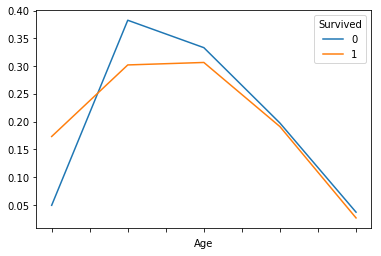

In [50]:
#age appears to be a factor with some confounding variable here 
crosstab.plot();

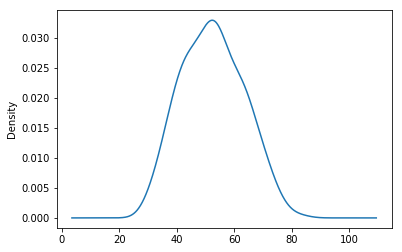

In [51]:
#the age distribution reveals that it is the biggest factor 

df['Age'].plot.density()

In [53]:
#amount of nodes one got operated on seems to play a noticeable role in your chance of survival. confounding variables abount however. 

crosstab = pd.crosstab(nodes_bins,df["Survived"], normalize='columns')
crosstab.head(11)

Survived,0,1
Nodes_Number,,
"(-0.052, 5.2]",0.567901,0.844444
"(5.2, 10.4]",0.148148,0.080000
"(10.4, 15.6]",0.135802,0.031111
"(15.6, 20.8]",0.049383,0.017778
"(20.8, 26.0]",0.074074,0.013333
"(26.0, 31.2]",0.000000,0.008889
"(31.2, 36.4]",0.012346,0.000000
"(41.6, 46.8]",0.000000,0.004444
"(46.8, 52.0]",0.012346,0.000000


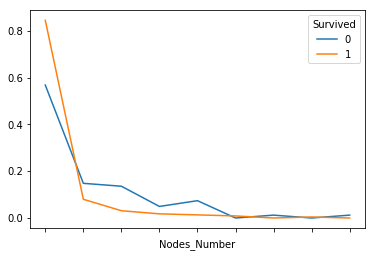

In [54]:
#patients that survived over 5 years had a higher liklihood of fewer auxillary nodes detection. a negative correlation. of course, confounding variables abound.

crosstab.plot();

In [35]:
crosstab = pd.crosstab(year_bins,df["Survived"], normalize='columns')
crosstab.head()

Survived,0,1
Patient_Year,,
"(57.989, 60.2]",0.308642,0.293333
"(60.2, 62.4]",0.123457,0.173333
"(62.4, 64.6]",0.197531,0.200000
"(64.6, 66.8]",0.234568,0.164444
"(66.8, 69.0]",0.135802,0.168889


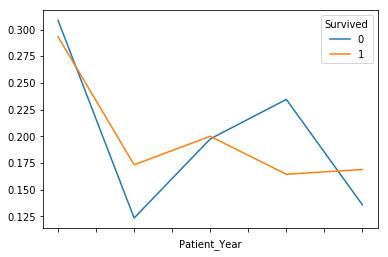

In [36]:
#this seems to show that the chance of survival decreases based on the year of operation. 
#confounding variable here could easily be the amount of people diagnosed with cancer in general, given that medical technology improvement likely improved rate of positive cancer diagnosis, 
#which would skew the data in the way shown below.  
crosstab.plot();

In [61]:
crosstab = pd.crosstab(year_bins,nodes_bins, normalize='columns')
crosstab.head()

Nodes_Number,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
Patient_Year,,,,,,,,,
"(57.989, 60.2]",0.309322,0.233333,0.388889,0.125,0.111111,0.5,0.0,0.0,1.0
"(60.2, 62.4]",0.156780,0.166667,0.111111,0.125,0.222222,0.5,1.0,0.0,0.0
"(62.4, 64.6]",0.194915,0.266667,0.166667,0.250,0.222222,0.0,0.0,0.0,0.0
"(64.6, 66.8]",0.177966,0.133333,0.277778,0.375,0.222222,0.0,0.0,0.0,0.0
"(66.8, 69.0]",0.161017,0.200000,0.055556,0.125,0.222222,0.0,0.0,1.0,0.0


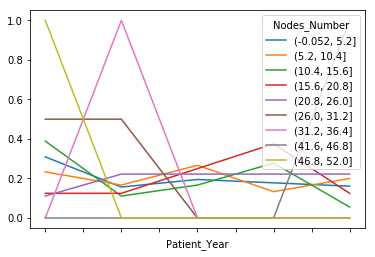

In [62]:
#reveals a slight yet noticeable positive correlation between year and amount of nodes detected, particularly for nodes amount between 31 and 35.  

crosstab.plot();

## Part 3 - DataFrame Filtering

Use DataFrame filtering to subset the data into two smaller dataframes. You should make one dataframe for individuals who survived >5 years and a second dataframe for individuals who did not. 

Create a graph with each of the dataframes (can be the same graph type) to show the differences in Age and Number of Positive Axillary Nodes Detected between the two groups.

In [38]:
# Dataframe for individuals who survived more than 5 years

survived = df[df['Survived'] == True]
survived.head()

,Age,Patient_Year,Nodes_Number,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


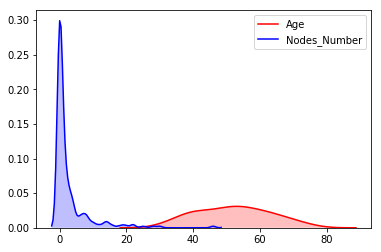

In [44]:
#importing seaborn to provide distribution of age and positive auxillary nodes detected 

import matplotlib.pyplot as plt
import seaborn as sns

# plot of age and nodes for person who did survive over 5 years. Shows less nodes detected for those that survived.
#in addition a flatter more even distribution for age than the ones that didn't surive. 
p1=sns.kdeplot(survived['Age'], shade=True, color="r")
p1=sns.kdeplot(survived['Nodes_Number'], shade=True, color="b")



In [45]:
# Dataframe for individuals who did not survive 

not_survived = df[df['Survived'] == False]
not_survived.head()

,Age,Patient_Year,Nodes_Number,Survived
7,34,59,0,0
8,34,66,9,0
24,38,69,21,0
34,39,66,0,0
43,41,60,23,0


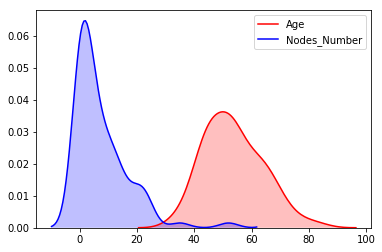

In [47]:
# plot of age and nodes for person that did not survive over 5 years
p1=sns.kdeplot(not_survived['Age'], shade=True, color="r")
p1=sns.kdeplot(not_survived['Nodes_Number'], shade=True, color="b")

## Part 4 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival? (As that feature goes up in value rate of survival increases)
- What is at least one feature that looks to have a negative relationship with survival? (As that feature goes down in value rate of survival increases)
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**1A.** There is a slight yet noticeable positive relationship between year of operation and amount of nodes detected, but not any noticeable postive relationship between increase in survial and any available variable. This could be due to a confounding variable being an increase in detected cancer rates overall during this time.

**2A.** The most noticeable negative relationship with survival is the year of operation, which relates to the relationship found previously. 

**3A.** They are related to each other because higher auxillary nodes were detected as the year increased which decreased their relationship to survival. The confounding variable here as stated previously is likely due to higher cancer detection rates overall or possibly higher cancer rates progressively with year.  


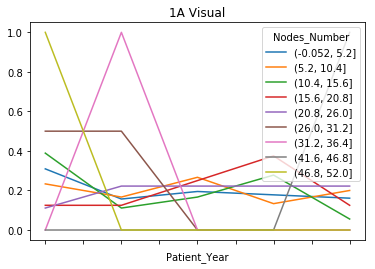

In [76]:
crosstab = pd.crosstab(year_bins,nodes_bins, normalize='columns')
crosstab.head()
crosstab.plot(title="1A Visual" );

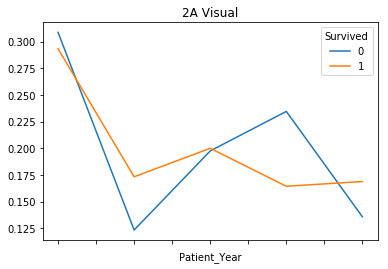

In [77]:
crosstab = pd.crosstab(year_bins,df["Survived"], normalize='columns')
crosstab.head()
crosstab.plot(title="2A Visual");